In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, plot_confusion_matrix

# 1. 데이터 불러오기

In [2]:
os.getcwd()

'C:\\Users\\user001039\\K_Project(2021)\\Private Learning Lab'

In [50]:
path_dir = ''
a = os.path.join(path_dir, 'googleplaystore')
b = os.path.join(path_dir, 'googleplaystore_user_reviews')
X = pd.read_csv(a+'.csv')
y = pd.read_csv(b+'.csv')

In [51]:
X

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [52]:
y

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# 2. EDA

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
X.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [55]:
y['App'].value_counts()

CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
Angry Birds Classic                                  320
Helix Jump                                           300
8 Ball Pool                                          300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Drawing Clothes Fashion Ideas                         30
Easy Hair Style Design                                30
Name: App, Length: 1074, dtype: int64

In [56]:
y['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

# 3. Preprocessing

## - 변수 선택

In [57]:
X = X.iloc[:, [0,1,2,3,4,5,6,8,9]]

In [58]:
X

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+,Books & Reference


In [59]:
X.info() # Object → float 바꿔줘야할 변수들 : Reviews, Size, Installs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


## - NA 처리

In [60]:
X.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Content Rating       1
Genres               0
dtype: int64

In [61]:
X['Rating'] = X['Rating'].fillna(X['Rating'].mean())

<ipython-input-61-d353dd3faa85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Rating'] = X['Rating'].fillna(X['Rating'].mean())


In [62]:
X.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Content Rating    1
Genres            0
dtype: int64

In [63]:
X = X.dropna(subset=['Type', 'Content Rating'])

In [64]:
X.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
Genres            0
dtype: int64

## - 형 변환

In [65]:
# X['Reviews'] = pd.to_numeric(X['Reviews'])
X['Reviews'] = X['Reviews'].astype(float)

<ipython-input-65-95090487d71d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Reviews'] = X['Reviews'].astype(float)


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
dtypes: float64(2), object(7)
memory usage: 846.8+ KB


In [67]:
X['Size'].value_counts()

Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
608k                     1
459k                     1
714k                     1
39k                      1
658k                     1
Name: Size, Length: 461, dtype: int64

In [68]:
# X['Size'] = X['Size'].astype(float)
def remove1(val):
    out=val
    if 'M' in out:
        out= float(out.replace('M', ''))*100000
    elif 'K' in out:
        out=float(out.replace('k', ''))*1000
    else:
        out=0
    return out
X['Size'] = X['Size'].apply(lambda x:remove1(x))

<ipython-input-68-24776c7a78e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Size'] = X['Size'].apply(lambda x:remove1(x))


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
dtypes: float64(3), object(6)
memory usage: 846.8+ KB


In [70]:
def remove2(val):
    out=val
    if '+' in out:
        out= float(out.replace('+', ''))
    else:
        out=0
    return out
X['Installs'] = X['Installs'].apply(lambda x:remove1(x))

<ipython-input-70-cd06eccb3c07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Installs'] = X['Installs'].apply(lambda x:remove1(x))


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 846.8+ KB


## - X, y 재정의

In [72]:
y = X.iloc[:, 6]
X = X.iloc[:, [1,2,3,4,5,7,8]]

In [73]:
X

,Category,Rating,Reviews,Size,Installs,Content Rating,Genres
0,ART_AND_DESIGN,4.100000,159.0,1900000.0,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.900000,967.0,1400000.0,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.700000,87510.0,870000.0,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.500000,215644.0,2500000.0,0,Teen,Art & Design
4,ART_AND_DESIGN,4.300000,967.0,280000.0,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...
10836,FAMILY,4.500000,38.0,5300000.0,0,Everyone,Education
10837,FAMILY,5.000000,4.0,360000.0,0,Everyone,Education
10838,MEDICAL,4.193338,3.0,950000.0,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.500000,114.0,0.0,0,Mature 17+,Books & Reference


In [74]:
y

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10839, dtype: object

In [75]:
y.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [76]:
print(10039/10839*100)

92.61924531783376


# 4. Encoding(더미변수화)

In [77]:
X = pd.get_dummies(X)

In [78]:
X

,Rating,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.100000,159.0,1900000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.900000,967.0,1400000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.700000,87510.0,870000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.500000,215644.0,2500000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.300000,967.0,280000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.500000,38.0,5300000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.000000,4.0,360000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,4.193338,3.0,950000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.500000,114.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Data split

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# 6. Scaler

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

# 7-1. Model - LR

In [81]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predict_lr = pd.DataFrame(model_lr.predict(X_valid))
predict_lr_proba = pd.DataFrame(model_lr.predict_proba(X_valid))

In [82]:
predict_lr

,0
0,Free
1,Free
2,Free
3,Free
4,Free
...,...
2163,Free
2164,Free
2165,Free
2166,Free


In [83]:
y_valid

8161    Paid
3034    Free
2507    Free
7688    Free
3745    Free
        ... 
2418    Paid
8160    Free
9024    Paid
6031    Free
7021    Free
Name: Type, Length: 2168, dtype: object

# 7-2. Model - RF

In [84]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_valid)
predict_rf_proba = pd.DataFrame(model_rf.predict_proba(X_valid))

In [85]:
predict_rf

array(['Free', 'Free', 'Free', ..., 'Free', 'Free', 'Free'], dtype=object)

# 8. Metircs

In [86]:
print(confusion_matrix(y_valid, predict_lr))

[[2004    4]
 [ 158    2]]


In [87]:
print(confusion_matrix(y_valid, predict_rf))

[[1982   26]
 [ 125   35]]


In [88]:
print(classification_report(y_valid, predict_lr))

              precision    recall  f1-score   support

        Free       0.93      1.00      0.96      2008
        Paid       0.33      0.01      0.02       160

    accuracy                           0.93      2168
   macro avg       0.63      0.51      0.49      2168
weighted avg       0.88      0.93      0.89      2168



In [89]:
print(classification_report(y_valid, predict_rf))

              precision    recall  f1-score   support

        Free       0.94      0.99      0.96      2008
        Paid       0.57      0.22      0.32       160

    accuracy                           0.93      2168
   macro avg       0.76      0.60      0.64      2168
weighted avg       0.91      0.93      0.92      2168



In [90]:
result_lr = roc_auc_score(y_valid, predict_lr_proba.iloc[:,1])
print(result_lr)

0.7465528510956175


In [91]:
result_rf = roc_auc_score(y_valid, predict_rf_proba.iloc[:,1])
print(result_rf)

0.8448923057768926


In [92]:
# help('sklearn.metrics.plot_confusion_matrix')

Text(0.5, 1.0, 'GoogleApp_ConfusionMatrix_LR')

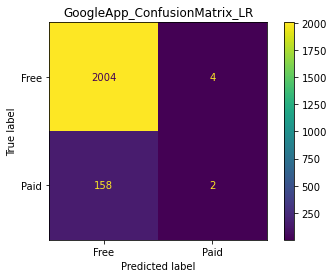

In [93]:
plot = plot_confusion_matrix(model_lr, X_valid, y_valid, display_labels=['Free', 'Paid'], normalize=None)
plot.ax_.set_title('GoogleApp_ConfusionMatrix_LR')

Text(0.5, 1.0, 'GoogleApp_ConfusionMatrix_RF')

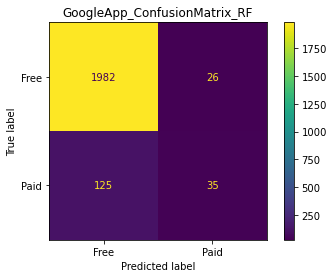

In [94]:
plot = plot_confusion_matrix(model_rf, X_valid, y_valid, display_labels=['Free', 'Paid'], normalize=None)
plot.ax_.set_title('GoogleApp_ConfusionMatrix_RF')

# 추가로 할 일
## - 전처리 추가
## - 시각화
## - Kfold, cross_val_score
## - 다른 모델 사용
## - Pipeline 구성
## - 최종 결과 % up
## - Warning 없애기